In [55]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from AI_labs import show_images
from PIL import Image
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

from AI_labs import learning_curve_by_history

#**1. Знайомство з набором даних**

In [71]:
!cp /content/drive/MyDrive/Colab\ Notebooks/images.zip .

In [57]:
!unzip -q images.zip

replace images/train/back_pack/amazon_0001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace images/train/back_pack/amazon_0002.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


#**2. Розпізнавання довільного зображення моделлю нейронної мережі, попередньо навченою на зображеннях ImageNet** 

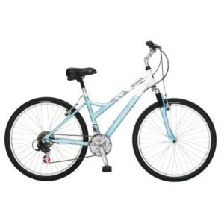

In [58]:
img = load_img('images/train/bike/amazon_0001.jpg', target_size=(224, 224))
img

In [59]:
array = img_to_array(img)
X = np.expand_dims(array, axis=0)
X.shape

(1, 224, 224, 3)

In [60]:
model = EfficientNetV2B0()
model.summary()

Model: "efficientnetv2-b0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 224, 224, 3)  0           ['input_3[0][0]']                
                                                                                                  
 normalization_2 (Normalization  (None, 224, 224, 3)  0          ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                  

In [61]:
X = preprocess_input(X)
X.min(), X.max()

(0.0, 255.0)

In [62]:
preds = model.predict(X)
decode_predictions(preds)


[[('n03792782', 'mountain_bike', 0.64170176),
  ('n02835271', 'bicycle-built-for-two', 0.16900043),
  ('n04482393', 'tricycle', 0.03328014),
  ('n03208938', 'disk_brake', 0.008128155),
  ('n04509417', 'unicycle', 0.0031775492)]]

In [63]:
#мобільний телефон "жабка"
array = img_to_array(img)
X = np.expand_dims(array, axis=0)
preds = model.predict(X)
decode_predictions(preds)

[[('n02951585', 'can_opener', 0.16032712),
  ('n03666591', 'lighter', 0.14445779),
  ('n04579432', 'whistle', 0.11079681),
  ('n02992529', 'cellular_telephone', 0.08471741),
  ('n02910353', 'buckle', 0.0643019)]]

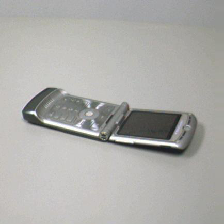

In [72]:
img = load_img('/content/images/val/mobile_phone/webcam_0026.jpg', target_size=(224, 224))
img

#**3. Генерація даних зображень із графічних файлів заданої теки**

In [64]:
ds_train = image_dataset_from_directory('/content/images/train',label_mode='categorical', image_size=(224,224), crop_to_aspect_ratio=True)

Found 703 files belonging to 8 classes.


In [65]:
ds_train.class_names, ds_train.element_spec

(['back_pack',
  'bike',
  'calculator',
  'headphones',
  'laptop_computer',
  'mobile_phone',
  'monitor',
  'projector'],
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 8), dtype=tf.float32, name=None)))

In [70]:
len(ds_train)

22

In [15]:
batch = list(ds_train)[0]
X_batch, y_batch = batch
X_batch.shape, y_batch.shape

(TensorShape([32, 224, 224, 3]), TensorShape([32, 8]))

In [16]:
X_batch = X_batch.numpy()
y_batch = y_batch.numpy()

In [17]:
X_batch = X_batch.astype('uint8')
class_indexes=y_batch.argmax(axis=1)


In [18]:
class_indexes, ds_train.class_names

(array([0, 5, 3, 1, 0, 2, 7, 3, 5, 2, 0, 0, 2, 4, 3, 7, 3, 6, 1, 5, 5, 7,
        7, 0, 4, 2, 5, 5, 7, 4, 2, 2]),
 ['back_pack',
  'bike',
  'calculator',
  'headphones',
  'laptop_computer',
  'mobile_phone',
  'monitor',
  'projector'])

In [19]:
class_names=np.array(ds_train.class_names)[class_indexes]

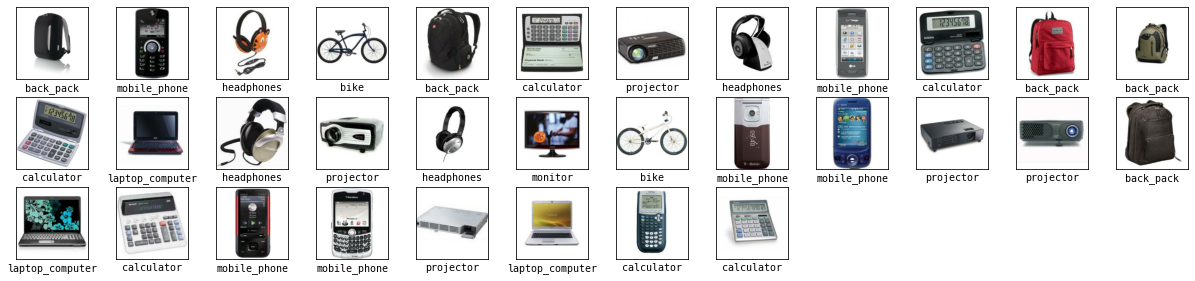

In [20]:
show_images(X_batch, labels=class_names,rand=False)

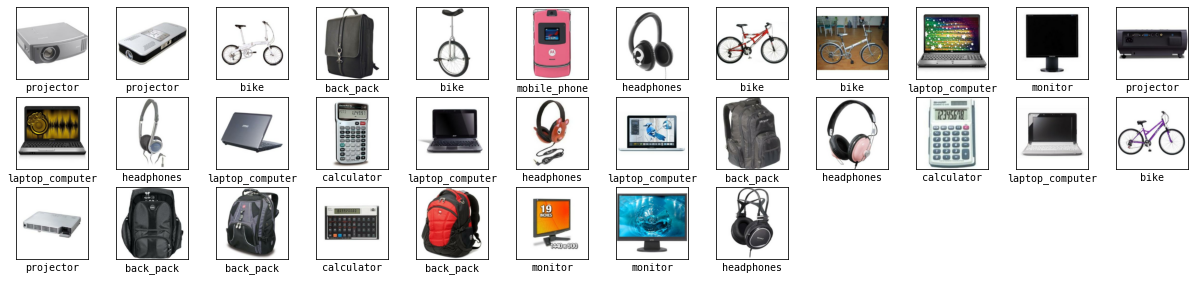

In [21]:
batch = list(ds_train)[4]
X_batch, y_batch = batch
X_batch = X_batch.numpy().astype('uint8')
y_batch = y_batch.numpy()
class_indexes=y_batch.argmax(axis=1)
class_names=np.array(ds_train.class_names)[class_indexes]
show_images(X_batch, labels=class_names,rand=False)

In [22]:
ds_val = image_dataset_from_directory('/content/images/val',label_mode='categorical', image_size=(224,224), crop_to_aspect_ratio=True, shuffle=False)
ds_test = image_dataset_from_directory('/content/images/test',label_mode='categorical', image_size=(224,224), crop_to_aspect_ratio=True, shuffle=False)

Found 189 files belonging to 8 classes.
Found 179 files belonging to 8 classes.


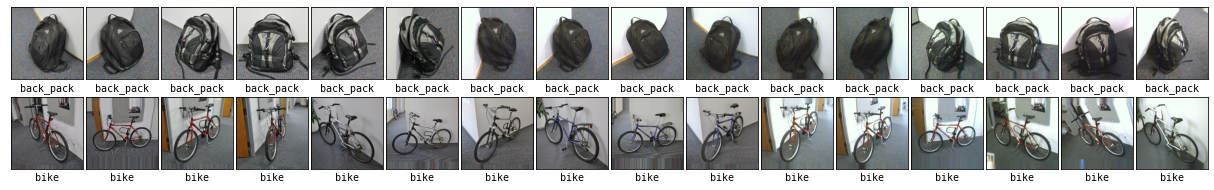

In [23]:
batch = list(ds_val)[0]
X_batch, y_batch = batch
X_batch = X_batch.numpy().astype('uint8')
y_batch = y_batch.numpy()
class_indexes=y_batch.argmax(axis=1)
class_names=np.array(ds_train.class_names)[class_indexes]
show_images(X_batch, labels=class_names,rand=False)

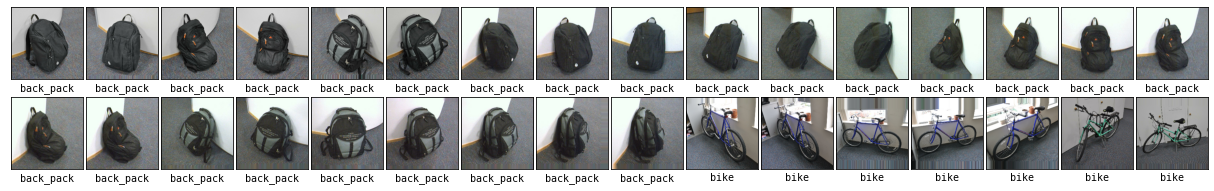

In [24]:
batch = list(ds_test)[0]
X_batch, y_batch = batch
X_batch = X_batch.numpy().astype('uint8')
y_batch = y_batch.numpy()
class_indexes=y_batch.argmax(axis=1)
class_names=np.array(ds_train.class_names)[class_indexes]
show_images(X_batch,labels=class_names,rand=False)

#**4.1 Побудова моделі класифікації зображень заданого набору даних з використаннія методики перенесення навчання**

In [25]:
base_model=EfficientNetV2B0(include_top=False, pooling='avg')
base_model.trainable=False

24289280/24274472 [==============================] - 0s 0us/step


In [26]:
def create_model():
  model = keras.Sequential([
                            base_model,
                            layers.Dense(8,activation='softmax')                                     
  ])
  model.compile(loss="categorical_crossentropy", metrics="accuracy")
  return model

In [27]:
es = keras.callbacks.EarlyStopping(patience=10,verbose=1,restore_best_weights=True)

Epoch 1/50
22/22 [==============================] - 15s 308ms/step - loss: 0.8671 - accuracy: 0.8620 - val_loss: 0.6423 - val_accuracy: 0.9471
Epoch 2/50
22/22 [==============================] - 5s 216ms/step - loss: 0.2276 - accuracy: 0.9801 - val_loss: 0.3970 - val_accuracy: 0.9683
Epoch 3/50
22/22 [==============================] - 5s 217ms/step - loss: 0.1082 - accuracy: 0.9858 - val_loss: 0.2805 - val_accuracy: 0.9735
Epoch 4/50
22/22 [==============================] - 5s 220ms/step - loss: 0.0618 - accuracy: 0.9900 - val_loss: 0.2254 - val_accuracy: 0.9735
Epoch 5/50
22/22 [==============================] - 5s 216ms/step - loss: 0.0399 - accuracy: 0.9957 - val_loss: 0.1938 - val_accuracy: 0.9683
Epoch 6/50
22/22 [==============================] - 5s 215ms/step - loss: 0.0277 - accuracy: 0.9972 - val_loss: 0.1796 - val_accuracy: 0.9683
Epoch 7/50
22/22 [==============================] - 5s 215ms/step - loss: 0.0200 - accuracy: 0.9957 - val_loss: 0.1687 - val_accuracy: 0.9524
Epoch

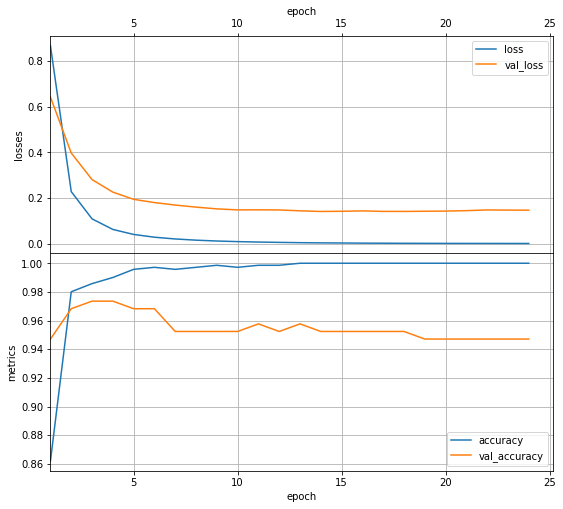

In [29]:
new_model=create_model()
%time hist=new_model.fit(ds_train,validation_data=ds_val,callbacks=[es],epochs=50)
learning_curve_by_history(hist.history)


In [32]:
print(new_model.evaluate(ds_val))
print(new_model.evaluate(ds_test))

6/6 [==============================] - 1s 189ms/step - loss: 0.1406 - accuracy: 0.9524
[0.14061427116394043, 0.9523809552192688]
6/6 [==============================] - 2s 343ms/step - loss: 0.2119 - accuracy: 0.9218
[0.21193240582942963, 0.9217877388000488]


#**5. Аугментація (штучне розширення) навчальних даних**

In [66]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.3, height_shift_range=0.4,
    rotation_range=35, zoom_range=0.2, horizontal_flip=True)

In [67]:
ds_train_aug = datagen.flow_from_directory('/content/images/train', class_mode='categorical', target_size=(224, 224))

Found 703 images belonging to 8 classes.


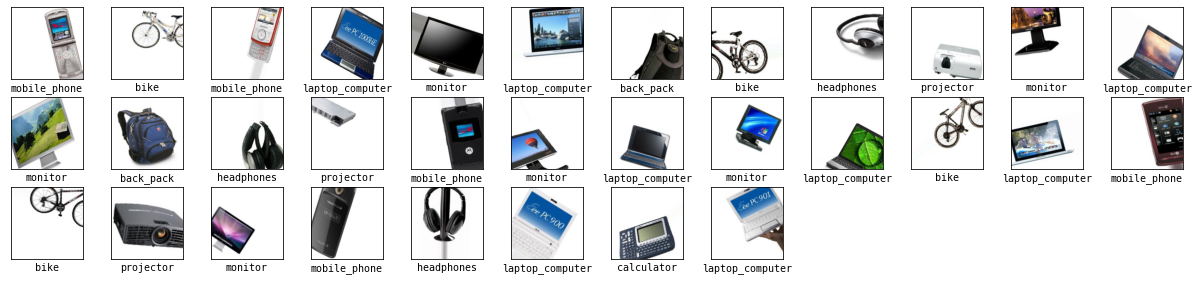

In [68]:
batch = ds_train_aug[4]
X_batch, y_batch = batch
X_batch = X_batch.astype('uint8')
class_indexes=y_batch.argmax(axis=1)
class_names=np.array(ds_train.class_names)[class_indexes]
show_images(X_batch, labels=class_names,rand=False)

Epoch 1/50
22/22 [==============================] - 21s 617ms/step - loss: 0.9132 - accuracy: 0.8393 - val_loss: 0.6862 - val_accuracy: 0.8889
Epoch 2/50
22/22 [==============================] - 12s 527ms/step - loss: 0.3050 - accuracy: 0.9673 - val_loss: 0.4042 - val_accuracy: 0.9153
Epoch 3/50
22/22 [==============================] - 12s 526ms/step - loss: 0.1586 - accuracy: 0.9758 - val_loss: 0.2840 - val_accuracy: 0.9577
Epoch 4/50
22/22 [==============================] - 12s 526ms/step - loss: 0.1083 - accuracy: 0.9787 - val_loss: 0.2196 - val_accuracy: 0.9630
Epoch 5/50
22/22 [==============================] - 12s 523ms/step - loss: 0.0746 - accuracy: 0.9872 - val_loss: 0.1981 - val_accuracy: 0.9577
Epoch 6/50
22/22 [==============================] - 11s 520ms/step - loss: 0.0681 - accuracy: 0.9844 - val_loss: 0.1877 - val_accuracy: 0.9471
Epoch 7/50
22/22 [==============================] - 12s 521ms/step - loss: 0.0506 - accuracy: 0.9929 - val_loss: 0.1699 - val_accuracy: 0.9471

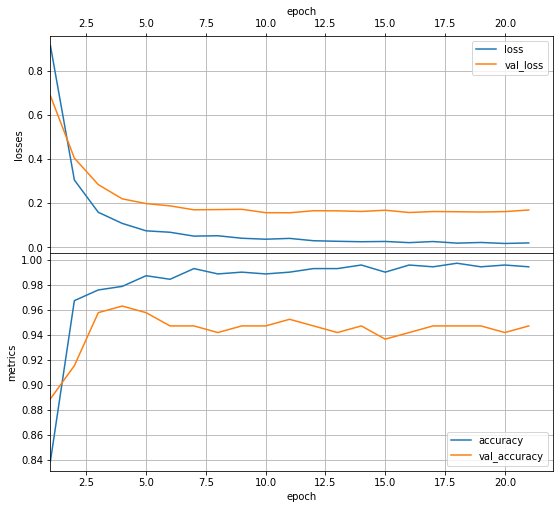

6/6 [==============================] - 1s 201ms/step - loss: 0.1564 - accuracy: 0.9524
[0.1564195454120636, 0.9523809552192688]
6/6 [==============================] - 1s 187ms/step - loss: 0.1820 - accuracy: 0.9330
[0.18201152980327606, 0.9329608678817749]


In [69]:
new_model = create_model()
%time hist = new_model.fit(ds_train_aug,validation_data=ds_val,callbacks=[es],epochs=50)
learning_curve_by_history(hist.history)
print(new_model.evaluate(ds_val))
print(new_model.evaluate(ds_test))
